In [25]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
df = pd.read_csv('video_games_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [3]:
df = df.dropna()
df.shape

(6825, 16)

In [4]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'Critic_Score', 'Critic_Count', 
               'User_Score', 'User_Count', 'Rating']
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


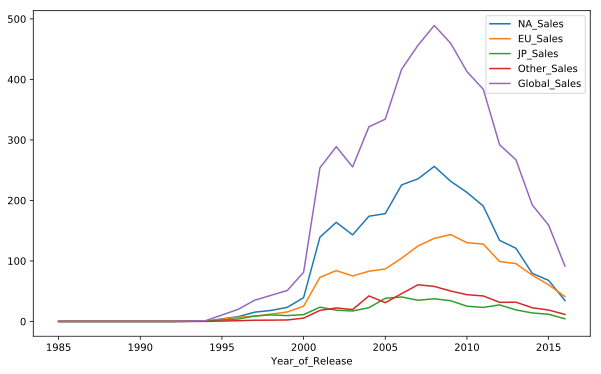

In [26]:
sales_df = df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']]
sales_df.groupby('Year_of_Release').sum().plot();

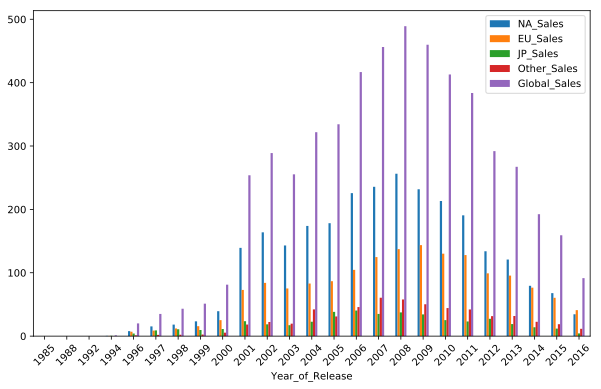

In [27]:
sales_df.groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

In [ ]:
cols = ['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

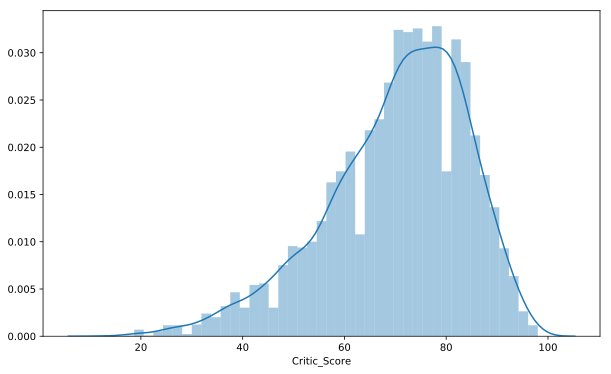

In [28]:
sns.distplot(df.Critic_Score);

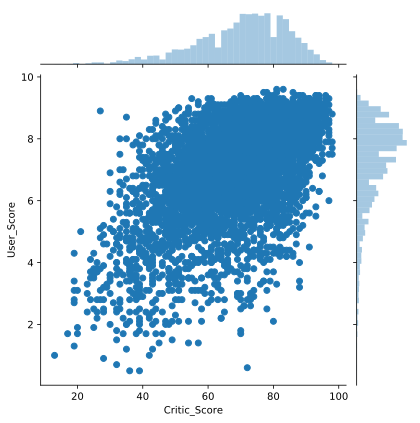

In [29]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df);

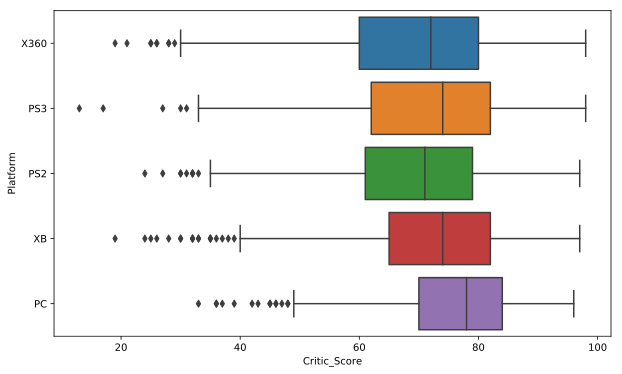

In [30]:
top_platforms = df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
sns.boxplot(y='Platform', x='Critic_Score', data=df[df.Platform.isin(top_platforms)], orient='h');

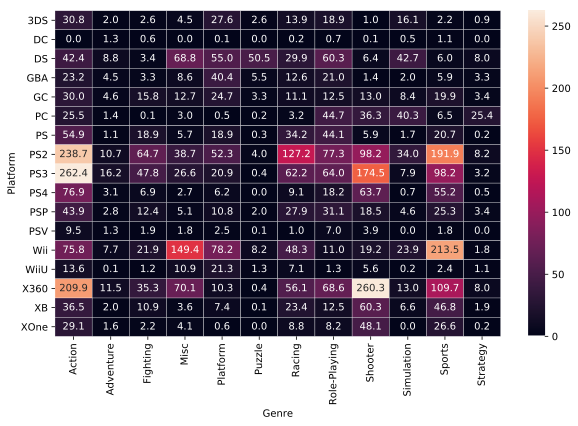

In [31]:
platform_genre_sales = df.pivot_table(index='Platform',
                                      columns='Genre', 
                                      values='Global_Sales',
                                      aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths='.3');

In [32]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [36]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count()
)
years_df.columns = ['Global_Sales', 'Number_of_Games']

trace0 = go.Scatter(
    x=years_df.index, 
    y=years_df.Global_Sales, 
    name='Global_Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [37]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

'file:///home/zark/Документы/Github/Data-Scientist/Scikit-learn/mlcourse.ai/Task_2_visualization/years_stats.html'

In [38]:
# считаем число проданных и вышедших игр по платформам
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

# создаем traces для визуализации
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

# создаем массив с данными и задаем title для графика и оси x в layout
data = [trace0, trace1]
layout = {'title': 'Share of platforms', 'xaxis': {'title': 'platform'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [39]:
# создаем Box trace для каждого жанра из наших данных
data = []
for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )

# визуализируем данные
iplot(data, show_link = False)